In [ ]:
"""
   @script-author : Josmi Agnes Jose
   @script-discription: The Sparks Internship : Task 1
   @python-version: python  -3.8.3
   
"""

<font size="5" color="white"><div align="center">Predict student score based on number of study hours.</div></font>

<font size="4" color="white">Importing libraries</font>

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [26]:
from jupyterthemes import jtplot
jtplot.style(theme='monokai')

<font size="4" color="white">Loading and understanding the dataset</font>

In [27]:
df=pd.read_csv("student_scores - student_scores.csv",index_col=False)

In [28]:
df.head(5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [29]:
# Shape of the dataset
df.shape

(25, 2)

In [30]:
# Summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [31]:
# Statistical details of the variables in dataset
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [32]:
# Checking for missing values
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [33]:
# Checking for duplicate values.
df.duplicated().any()

False

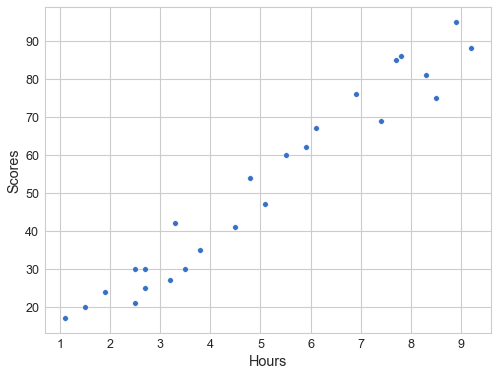

In [46]:
# Plotting the distribution of scores
plt.figure(figsize=(8,6))
sns.set_style("whitegrid")
sns.scatterplot(data=df, y="Scores", x="Hours")

From the above scatter plot its clear that there exists a linear relationship between the number of study hours of a student and the his/her percentage.

<font size="4" color="white">Preparing data for training the linear regression model.</font>

In [35]:
# Dividing the dataset into features(inputs) and target(output).
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [36]:
# Splitting the dataset into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 12)

print("X_train shape: ",X_train.shape)
print("y_train shape", y_train.shape)
print("\nX_test shape: ", X_test.shape)
print("y_test shape",y_test.shape)

X_train shape:  (16, 1)
y_train shape (16,)

X_test shape:  (9, 1)
y_test shape (9,)


<font size="4" color="white">Training the simple linear regression model</font>

In [37]:
# Training the model
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [38]:
# Making prediction based on the fitted model
y_pred = lm.predict(X_test)
x_pred = lm.predict(X_train)

<font size="4" color="white">Visualising the model results</font>

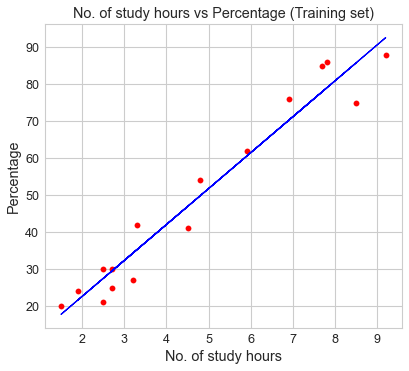

In [39]:
# Visualising training set results
sns.set_style("whitegrid")
plt.scatter(X_train, y_train, color = 'red',)        # The orginal train data points
plt.plot(X_train, x_pred, color = 'blue')     # The predicted line
plt.title('No. of study hours vs Percentage (Training set)')
plt.xlabel('No. of study hours')
plt.ylabel('Percentage')
plt.show()

In the above 2D plot the red points indicate the real scores in the *training set* and the blue line is the fitted regression line which contains the predicted scores. 

We can see that the regression line is calculated in such a way that it is close to the real scores of the students.

To get the predicted score corresponding to a particular number of study hours we can project the number of study hours to the blue regression line.

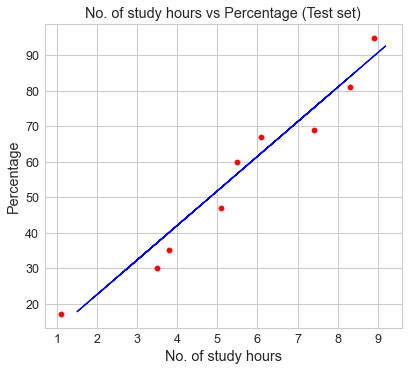

In [47]:
# Visualizing test set results
sns.set_style("whitegrid")
plt.scatter(X_test, y_test, color = 'red')         # The orginal test data points
plt.plot(X_train, x_pred, color = 'blue')  # The predicted line
plt.title('No. of study hours vs Percentage (Test set)')
plt.xlabel('No. of study hours')
plt.ylabel('Percentage')
plt.show()

Here the red points indicate the actual scores in the test set and the blue line indicate the fitted regression line. 

Our model was able to do a good job in predicting the scores based on number of study hours.

<font size="4" color="white">Evaluating the Regression model</font>

In [41]:
# Regression Equation
print(lm.coef_)
print(lm.intercept_)

[9.73039462]
3.1488854302640945


Therefore, the equation of our simple linear regression model is:

$$ Score (percentage)= 3.148 + (Hours * 9.73) $$

In [42]:
from sklearn import metrics

In [43]:
# Summary metrics of test set
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R squared:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 4.821827827425779
Mean Squared Error: 25.18450598706217
Root Mean Squared Error: 5.018416681291239
R squared: 0.956158500215946


In [44]:
# Summary metrics of training set
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, x_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, x_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, x_pred)))
print('R squared:', metrics.r2_score(y_train, x_pred))

Mean Absolute Error: 4.955423486293803
Mean Squared Error: 31.281943468219698
Root Mean Squared Error: 5.5930263246492675
R squared: 0.9495947938778403


In [45]:
# Making a single prediction
print(lm.predict([[9.25]]))

[93.15503565]


Therefore, our model predicts that the score of a student who studies for 9.25 hours per day would be 93.15%.